#### Loading Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

#### Load dataset

In [15]:
data = pd.read_csv('../data/boston_housing.csv')
data.columns = data.columns.str.upper()

In [17]:
data['CRIM_by_DIS'] = data['CRIM'] / data['DIS']

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[['RM', 'LSTAT']])
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['RM', 'LSTAT']))
data = pd.concat([data, poly_features_df], axis=1)

data['log_CRIM'] = np.log(data['CRIM'] + 1)

#### Split data

In [18]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train model with new features

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Evaluate model

In [27]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(r2)

0.8126723026072971


#### Plot residuals

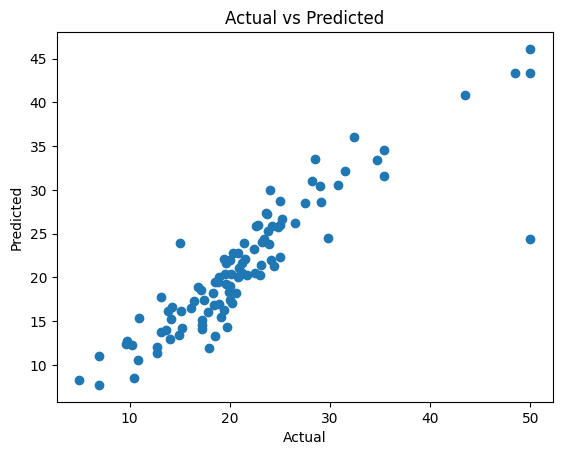

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()